In [1]:
import numpy as np
# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
plt.style.use('seaborn-white')
mpl.rc('image', cmap='jet')
mpl.rcParams['font.size'] = 18


# Exemple d'algorithme glouton d'allocations de bits 

In [66]:
c = np.pi * np.e/6  #1.423289037112261

In [145]:
N = 5000  # number of channels of Y in the base following a gaussian distrib
rng = np.random.default_rng(2022)
mu, sigma = 3.,1.
Dm = c * rng.lognormal(mu, sigma, N)   # Distostion  of each  gaussian distrib

In [146]:
Dm_orig = Dm.copy()

In [147]:
bits = np.zeros_like(Dm)   # bits array

In [148]:
R=2*N  # constraint: total number of bits to allocate

In [149]:
# Algorthime glouton
while np.sum(bits) < R:         # while there is some bits to allocate 
    m = np.argmax(Dm)       # select the channel which has the biggest distortion error
    bits[m] +=1                 # increase the number of bits to this channel
    Dm[m] /= 4.             # decrease the channel distortion

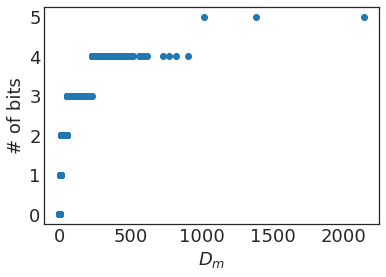

In [150]:
# Show the bits allowed for each channel
plt.scatter(Dm_orig,bits);
plt.xlabel(r"$D_m$")
plt.ylabel("# of bits");

In [151]:
# The total distortion from the allocated bits
D_algo = np.sum(Dm)
# Optimised  total distortion 
D_optim =  N*(np.product(Dm_orig**(1./N))/(4.**(R/N)))

In [152]:
print(fr"D_optim = {D_optim:.3e}, D_algo = {D_algo:.3e}, eff: {D_optim/D_algo:.3f}")

D_optim = 9.090e+03, D_algo = 9.820e+03, eff: 0.926
